# Imports
nothing special just copy paste from some random BLU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

more imports needed

In [2]:
import requests
import sqlalchemy

# Database

In [3]:
# host=batch4-s02-db-instance.ctq2kxc7kx1i.eu-west-1.rds.amazonaws.com
# port=5432
# username=ldsa_student
# password=<same as in specialization 2>
# dbname=hckt2_students
# schema=public

username = 'ldsa_student'
password = 'R4Fr4P3aAgMYBqqP'  
host_name = 'batch4-s02-db-instance.ctq2kxc7kx1i.eu-west-1.rds.amazonaws.com'
port = 5432
db_name = 'hckt2_students'
schema = 'public'

conn_str = 'postgresql://{}:{}@{}:{}/{}'.format(username, password, host_name, port, db_name)
conn_args = {'options': '-csearch_path={}'.format(schema)}

engine = sqlalchemy.create_engine(conn_str, connect_args=conn_args)

query = '''select *
from water w 
	natural join wind w2 '''

db_data = pd.read_sql_query(query, engine)

In [4]:
# query = '''select *
# from water w 
# 	natural join wind w2 '''

# db_data = pd.read_sql_query(query, engine)

query = '''select coalesce( w.timestamp,w2.timestamp) as timestamp,w.rhum_db,w.prcp_db,w2.wspd_db,w2.wdir_db,w2.pres_db
from water w
full join wind w2 on w.timestamp = w2.timestamp '''

db_data = pd.read_sql_query(query, engine)

# API

In [5]:
base_url = 'https://hckt02-api.lisbondatascience.org/hckt_api_batch/'

response_list = list()
for page in range(157):
    url = base_url + str(page)
    response_list.append(requests.get(url).json())

In [6]:
# api_time_stamp = list()
# api_count = list()
# for ele in response.json():
#     api_time_stamp.append(ele['timestamp'])
#     api_count.append(ele['count'])

# api_data = pd.DataFrame({'timestamp': api_time_stamp, 'count': api_count})

api_time_stamp = list()
api_count = list()
for response in response_list:
    for ele in response:
        api_time_stamp.append(ele['timestamp'])
        api_count.append(ele['count'])

api_data = pd.DataFrame({'timestamp': api_time_stamp, 'count': api_count})

In [7]:
db_data

,timestamp,rhum_db,prcp_db,wspd_db,wdir_db,pres_db
0,1654621200,NaN,NaN,18.4,200.0,1010.0
1,1650416400,NaN,NaN,14.8,19.0,1017.3
2,1695322800,NaN,NaN,5.5,170.0,995.6
3,1668279600,NaN,NaN,9.3,130.0,1025.3
4,1629108000,NaN,NaN,24.1,313.0,1016.5
...,...,...,...,...,...,...
5626,1668729600,85.0,0.8,NaN,NaN,NaN
5627,1678100400,88.0,0.0,NaN,NaN,NaN
5628,1628118000,90.0,0.0,NaN,NaN,NaN
5629,1670403600,97.0,0.0,NaN,NaN,NaN


In [8]:
# api_data.to_csv("api_data.csv")

# web scraping

In [9]:
import utils
from bs4 import BeautifulSoup

In [10]:
# response = requests.get("https://s02-infrastructure.s3.eu-west-1.amazonaws.com/hackathon-02-batch7/index.html")
# utils.friendly_print_string(response.content)


In [11]:
# soup = BeautifulSoup(response.content, 'html.parser')
# soup

In [12]:
ws_data = pd.read_json('ws_data.json')

In [13]:
# response = requests.get("https://s02-infrastructure.s3.eu-west-1.amazonaws.com/hackathon-02-batch7/index.html")
# soup = BeautifulSoup(response.content, 'html.parser')
# table = soup.find_all("table")[1]
# df = pd.read_html(str(table))[0]
# df

# Files

In [14]:
# directory = 'data/'
# file_names = ['data_0.tsv', 'data_1.json', 'data_2_csv', 'data_3.csv']

In [15]:
# f0_data = pd.read_csv((directory+file_names[0]), sep='\t')
# f0_data

# Data

In [16]:
ws_data

,weather codes,what it looks like
0,1656896400,Fair
1,1685127600,Clear
2,1622311200,Fair
3,1666148400,Cloudy
4,1624255200,Light Rain
...,...,...
15679,1676451600,Cloudy
15680,1635807600,Fair
15681,1630807200,Cloudy
15682,1629262800,Overcast


In [17]:
api_data

,timestamp,count
0,1656896400,0
1,1685127600,157
2,1622311200,0
3,1666148400,0
4,1624255200,1342
...,...,...
15679,1676451600,0
15680,1635807600,0
15681,1630807200,0
15682,1629262800,125


In [18]:
db_data

,timestamp,rhum_db,prcp_db,wspd_db,wdir_db,pres_db
0,1654621200,NaN,NaN,18.4,200.0,1010.0
1,1650416400,NaN,NaN,14.8,19.0,1017.3
2,1695322800,NaN,NaN,5.5,170.0,995.6
3,1668279600,NaN,NaN,9.3,130.0,1025.3
4,1629108000,NaN,NaN,24.1,313.0,1016.5
...,...,...,...,...,...,...
5626,1668729600,85.0,0.8,NaN,NaN,NaN
5627,1678100400,88.0,0.0,NaN,NaN,NaN
5628,1628118000,90.0,0.0,NaN,NaN,NaN
5629,1670403600,97.0,0.0,NaN,NaN,NaN


## (not) Final Table

In [19]:
Final_merge = pd.read_csv('Final_merge.csv')

Final_merge['datetime'] = pd.to_datetime(Final_merge['timestamp'], unit='s')
Final_merge['year'] = Final_merge['datetime'].dt.year
Final_merge['month'] = Final_merge['datetime'].dt.month
Final_merge['weekday'] = Final_merge['datetime'].dt.weekday
Final_merge['hour'] = Final_merge['datetime'].dt.hour
Final_merge = Final_merge.drop(columns='Unnamed: 0')

In [20]:
Final_merge.head()

,timestamp,weco,count,rhum_db,prcp_db,wspd_db,wdir_db,pres_db,datetime,year,month,weekday,hour
0,1656896400,Fair,0,NaN,NaN,NaN,NaN,NaN,2022-07-04 01:00:00,2022,7,0,1
1,1685127600,Clear,157,NaN,NaN,NaN,NaN,NaN,2023-05-26 19:00:00,2023,5,4,19
2,1622311200,Fair,0,NaN,NaN,NaN,NaN,NaN,2021-05-29 18:00:00,2021,5,5,18
3,1666148400,Cloudy,0,NaN,NaN,NaN,NaN,NaN,2022-10-19 03:00:00,2022,10,2,3
4,1624255200,Light Rain,1342,NaN,NaN,NaN,NaN,NaN,2021-06-21 06:00:00,2021,6,0,6


In [21]:
# data.dtypes
# data.nunique()
# data.isna().sum()

Final_merge.dtypes

timestamp             int64
weco                 object
count                 int64
rhum_db             float64
prcp_db             float64
wspd_db             float64
wdir_db             float64
pres_db             float64
datetime     datetime64[ns]
year                  int32
month                 int32
weekday               int32
hour                  int32
dtype: object

In [22]:
Final_merge.nunique()


timestamp    15684
weco            15
count         2225
rhum_db         72
prcp_db         32
wspd_db         35
wdir_db        358
pres_db        506
datetime     15684
year             3
month           12
weekday          7
hour            24
dtype: int64

In [23]:
Final_merge.isna().sum()

timestamp        0
weco           159
count            0
rhum_db      12547
prcp_db      12547
wspd_db      12547
wdir_db      12547
pres_db      12547
datetime         0
year             0
month            0
weekday          0
hour             0
dtype: int64

## check columns

In [28]:
Final_merge.weco.value_counts()

weco
Fair                 4971
Cloudy               4137
Overcast             2835
Light Rain           1957
Clear                 829
Rain                  262
Rain Shower           169
Fog                   157
Heavy Rain Shower     130
Heavy Rain             51
Sleet                  11
Lihgt Snowfall          6
Snow Shower             6
Freezing Rain           2
Sleet Shower            2
Name: count, dtype: int64

<Axes: >

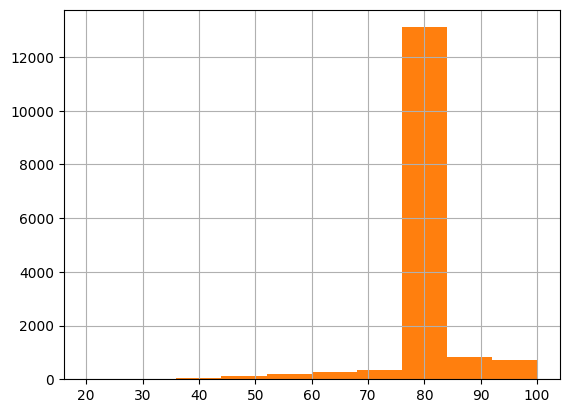

In [40]:
Final_merge.rhum_db.hist()
Final_merge['rhum_db'] = Final_merge['rhum_db'].fillna(Final_merge['rhum_db'].median())
Final_merge['rhum_db']
Final_merge.rhum_db.hist()

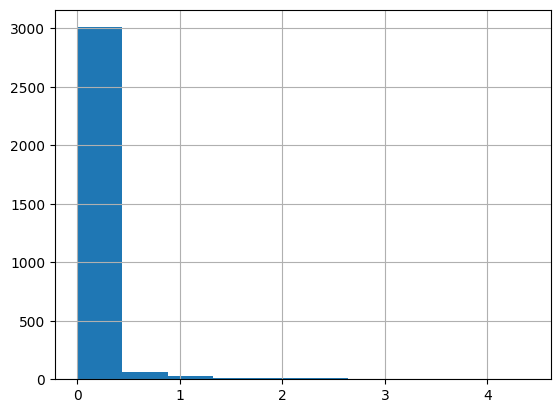

In [45]:
Final_merge.prcp_db.hist()
Final_merge['prcp_db'] = Final_merge['prcp_db'].fillna(Final_merge['prcp_db'].median())

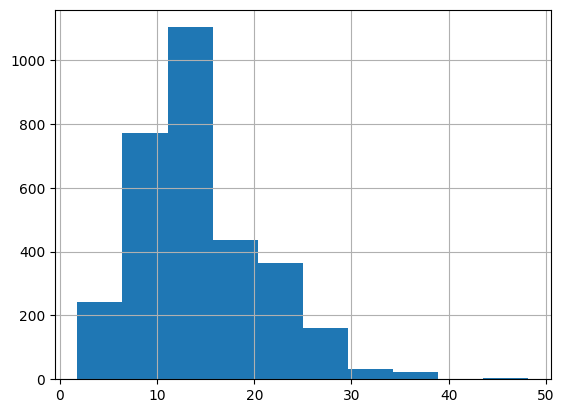

In [46]:
Final_merge.wspd_db.hist()
Final_merge['wspd_db'] = Final_merge['wspd_db'].fillna(Final_merge['wspd_db'].median())

<Axes: >

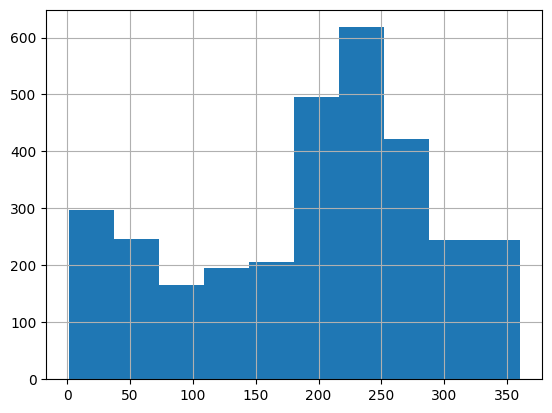

In [37]:
Final_merge.wdir_db.hist()

<Axes: >

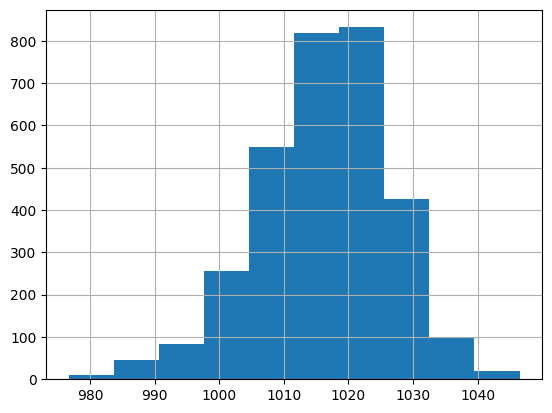

In [38]:
Final_merge.pres_db.hist()

In [43]:
Final_merge.prcp_db.value_counts()

prcp_db
0.0    2710
0.1     147
0.2      75
0.3      46
0.4      30
0.5      22
0.6      16
0.7      13
0.8      10
0.9       9
1.2       5
1.6       5
1.3       5
2.8       4
1.9       4
1.1       4
1.8       4
1.0       3
1.5       3
2.5       3
1.7       3
2.7       2
2.1       2
2.4       2
4.2       2
2.3       2
3.4       1
1.4       1
4.4       1
2.2       1
3.1       1
2.0       1
Name: count, dtype: int64